# Titanic Analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print()
print('----------[train infomation]----------')
print(train.info())
print()
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)

----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns)

In [10]:
# 파이차트 함수 생성
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
       plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
       plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
       plt.title(str(index) + '\'s ratio')

    plt.show()

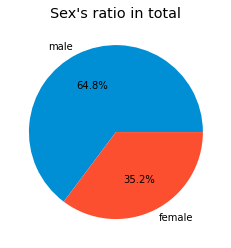

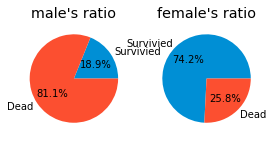

In [11]:
pie_chart('Sex') # 성별 파이차트

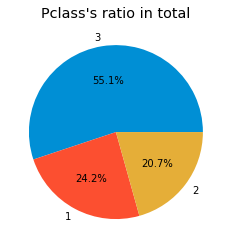

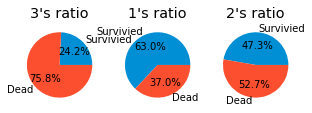

In [12]:
# Class 좌석등급별
pie_chart('Pclass')

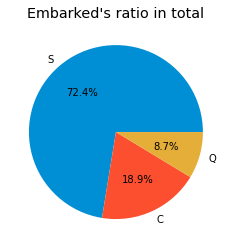

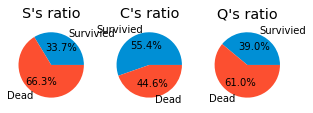

In [13]:
# 승선한 장소
pie_chart('Embarked')

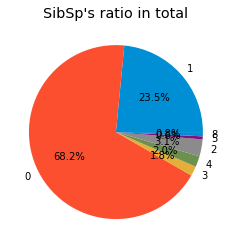

KeyError: 5

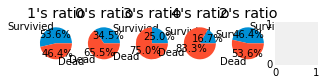

In [16]:
# 동반한 형제자매 생존
pie_chart('SibSp')

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Text(0.5, 0, 'SibSp')

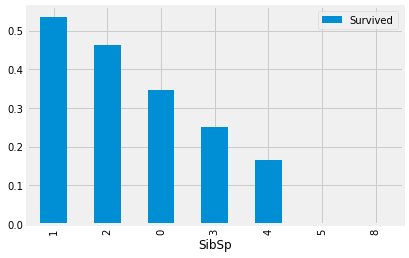

In [15]:
# 동반한 형제자매 생존
sbs=train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sbs)
sbs.plot("SibSp",kind="bar").set_xlabel("SibSp")

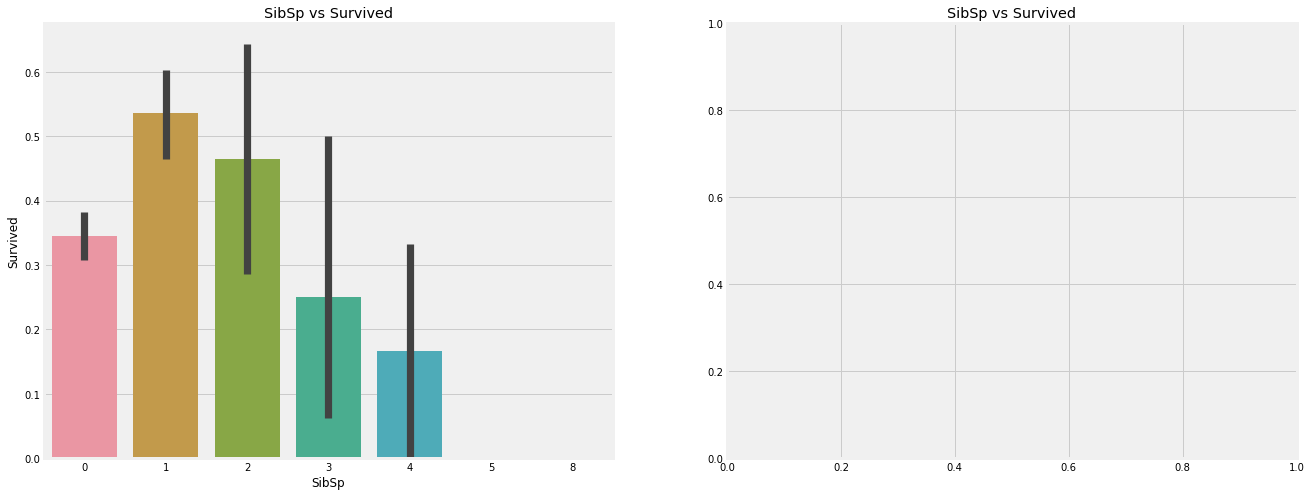

In [41]:
# Bar차트와 Factor차트로 가족이 있는 사람들의 생존율을 확인해본다.
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

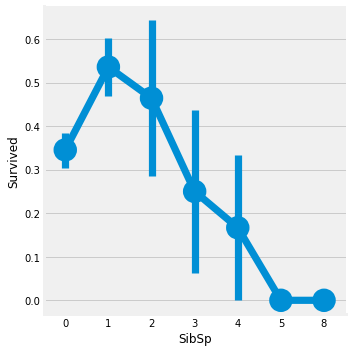

In [32]:
sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

# 가족이 많을수록 생존률 다운.

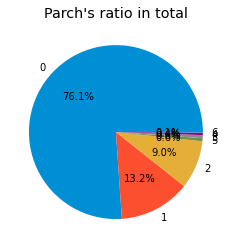

KeyError: 4

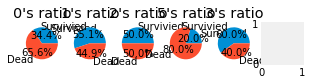

In [17]:
# 동반한 부모자녀 생존
pie_chart('Parch')

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


Text(0.5, 0, 'Parch')

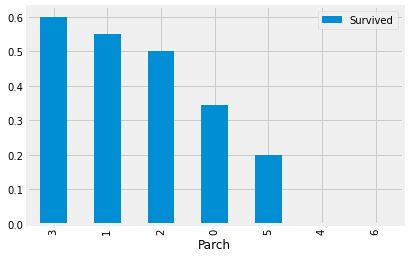

In [18]:
# 동반한 부모자녀 생존
pcs=train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(pcs)
pcs.plot("Parch",kind="bar").set_xlabel("Parch")

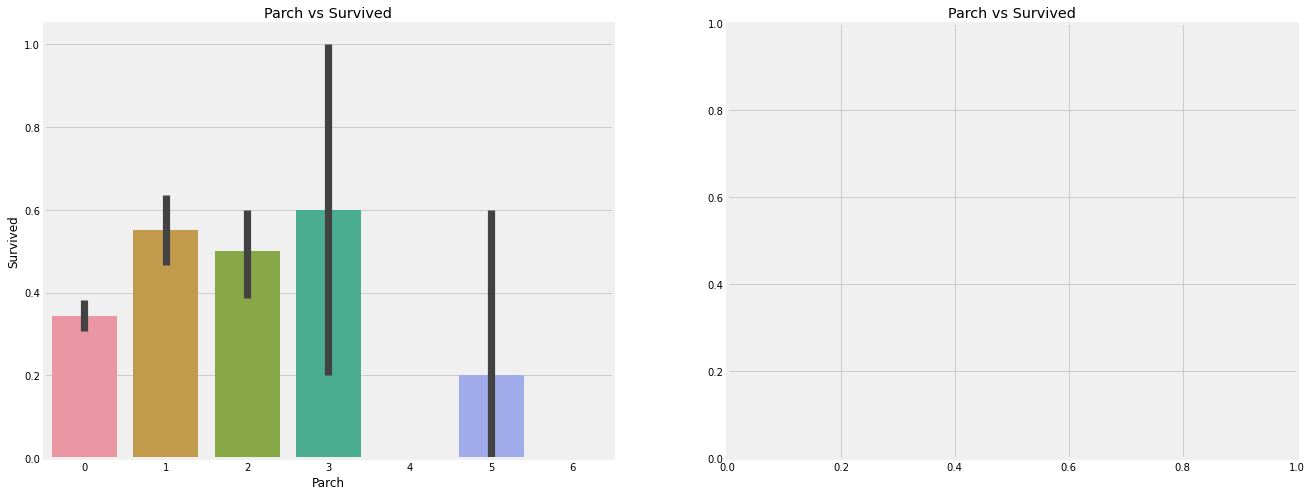

In [43]:
# 부모자식 생존율 확인
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

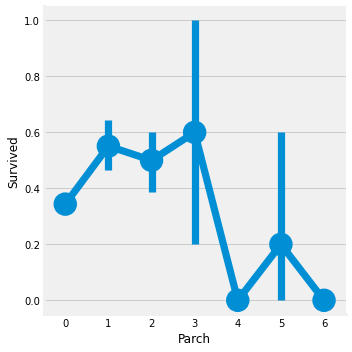

In [44]:
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

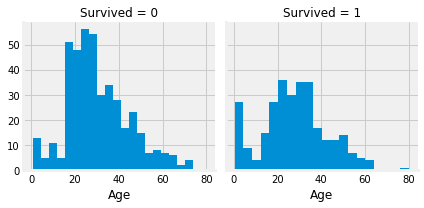

In [22]:
# 생존자 나이
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

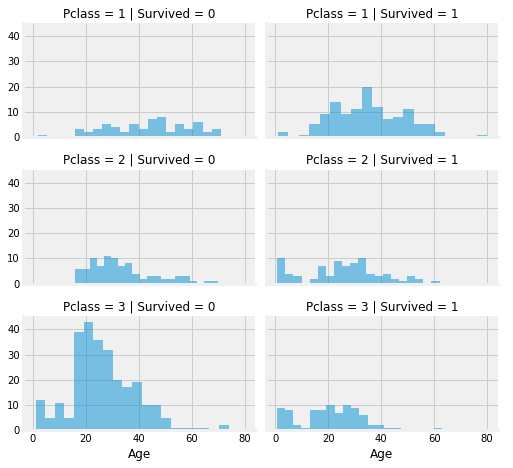

In [53]:
# 1.1 다중 변수 비교(categorical변수와의 결합) ; 나이, 객실 등급
#생존 구분이 비교적 명확한 categorical변수와의 결합을 통해 
# Continuous변수의 설명력 보유 여부를 살펴봅니다.
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [24]:
# Crosstab으로 이제 객실과 성별에 대해 생존자 수를 확인해본다.
# 1등급 여자일수록 생존률이 높다. 1등급이 생존률이 엄청 높음.
# 2등급 남자는 왜...
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

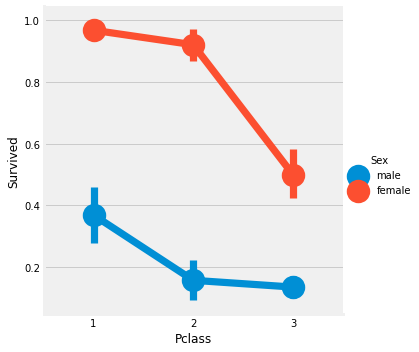

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)

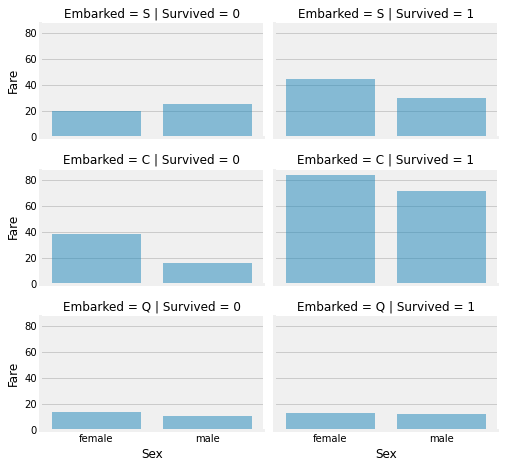

In [54]:
 # 2.1 다중 변수 비교(categorical변수와의 결합) ; 요금, 성별, 승선 항

#요금의 Central Tendency(평균, 최빈치, 중앙값 등)을 나타냅니다.
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

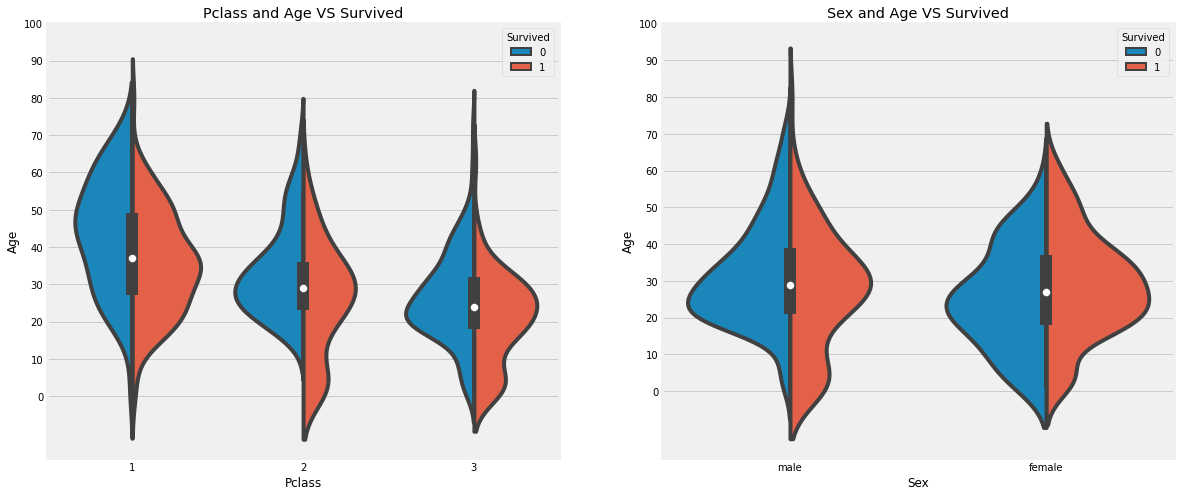

In [26]:
# 바이올린 플롯으로 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자 비율을 살펴본다.
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

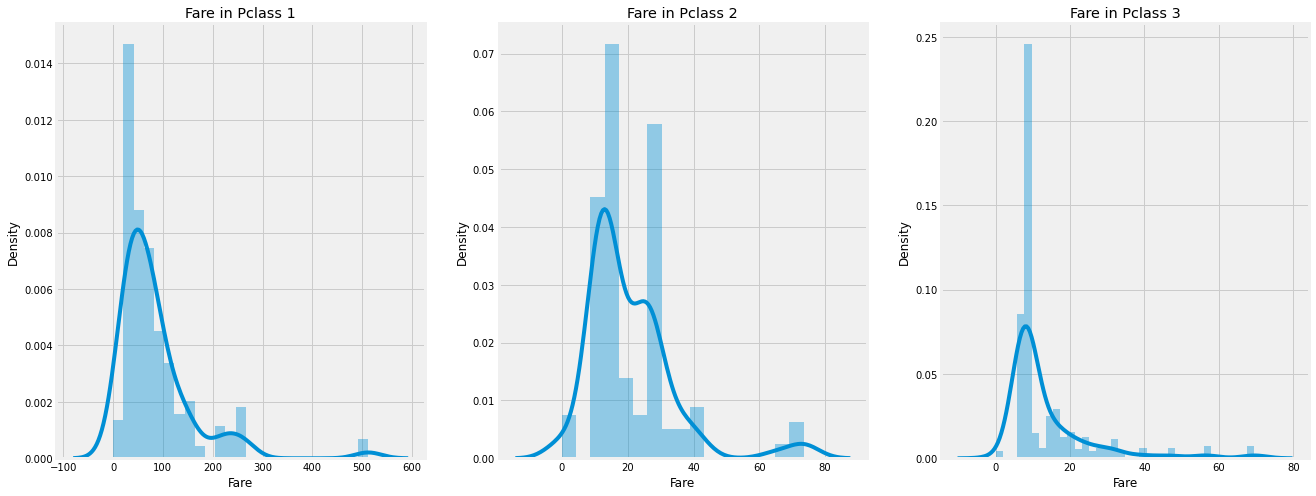

In [46]:
# 객실별로 티켓 비용을 분석해본다.
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show

# 객실요금

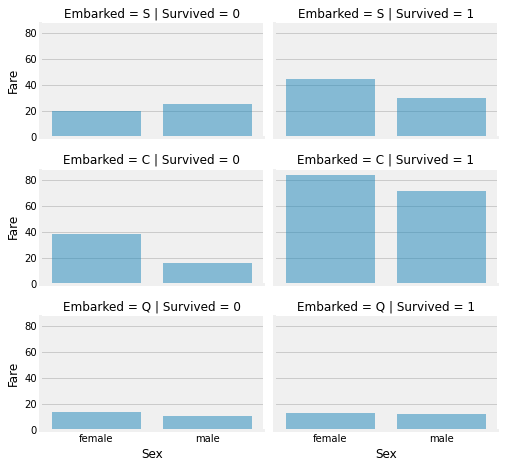

In [49]:
#요금의 Central Tendency(평균, 최빈치, 중앙값 등)을 나타냅니다.
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:>

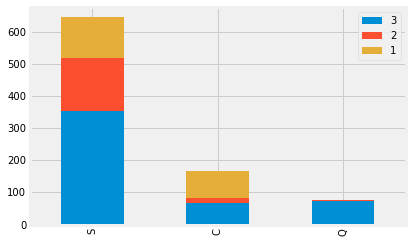

In [55]:
# 승선항과 객실등급 비교
S = train[train['Embarked'] == 'S']['Pclass'].value_counts()
C = train[train['Embarked'] == 'C']['Pclass'].value_counts()
Q = train[train['Embarked'] == 'Q']['Pclass'].value_counts()
df = pd.DataFrame([S, C, Q])
df.index = ['S', 'C', 'Q']
df.plot(kind='bar', stacked=True)

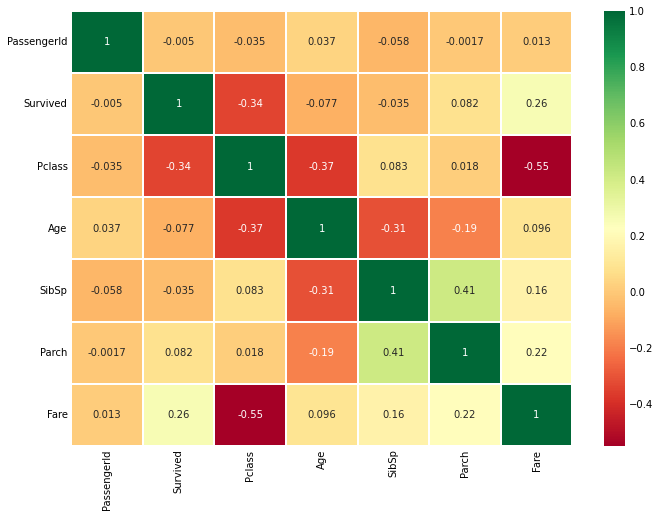

In [48]:
# 데이터에 대한 상관관계를 heatmap을 통해 살펴본다
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 큰 상관관게가 보이지는 않으므로 전체 featrue 로 분석진행

## 데이터 전처리

In [77]:
# 필요없는 변수 제거
print("Before", train.shape, test.shape)

train= train.drop(['Ticket', 'Cabin'], axis=1)
test= test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [78]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [79]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [80]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1  


In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [82]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
#test데이터셋에는 PassegnerId변수가 없습니다. 

print(train.shape, test.shape)

(891, 9) (418, 9)


In [83]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [84]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print(train.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


In [86]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [87]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [88]:
train.median()

Survived     0.0000
Pclass       3.0000
Sex          0.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
Title        1.0000
dtype: float64

In [127]:
test['Age'] = test['Age'].fillna(28)
train['Age'] = train['Age'].fillna(28)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    int32  
 5   Embarked     418 non-null    int32  
 6   Title        418 non-null    int64  
 7   Age*Class    332 non-null    float64
 8   IsAlone      418 non-null    int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


In [90]:
# Embarked 결측치 채우기 최빈값으로
freq_port = train.Embarked.dropna().mode()[0] # "S"
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [92]:
train['AgeBand'] = pd.cut(train['Age'], 5)
#임의로 5개의 그룹을 지정합니다.
print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', 
                                                                                    ascending=True))

            AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [93]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
print(train.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title
0         0       3    0  1.0      1      0   7.2500         0      1
1         1       1    1  2.0      1      0  71.2833         1      3
2         1       3    1  1.0      0      0   7.9250         0      2
3         1       1    1  2.0      1      0  53.1000         0      3
4         0       3    0  2.0      0      0   8.0500         0      1


In [94]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

print(train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(3))

   Age*Class  Age  Pclass
0        3.0  1.0       3
1        2.0  2.0       1
2        3.0  1.0       3


In [95]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
                                                               #자기 자신을 포함시킵니다.
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [96]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [97]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

In [98]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True))

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int32   
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    int32   
 5   Embarked   891 non-null    int32   
 6   Title      891 non-null    int64   
 7   Age*Class  891 non-null    float64 
 8   IsAlone    891 non-null    int64   
 9   FareBand   891 non-null    category
dtypes: category(1), float64(2), int32(3), int64(4)
memory usage: 53.4 KB


In [108]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [109]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)

In [110]:
print(train.head(3))

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  Age*Class  IsAlone
0         0       3    0  1.0     0         0      1        3.0        0
1         1       1    1  2.0     0         1      3        2.0        0
2         1       3    1  1.0     0         0      2        3.0        1


In [111]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,0,3,0,1.0,0,0,1,3.0,0
1,1,1,1,2.0,0,1,3,2.0,0
2,1,3,1,1.0,0,0,2,3.0,1
3,1,1,1,2.0,0,0,3,2.0,0
4,0,3,0,2.0,0,0,1,6.0,1


In [133]:
# One-hot-encoding for categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [134]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,3,0,2.0,0,2,1,6.0,1
1,3,1,2.0,0,0,3,6.0,0
2,2,0,3.0,0,2,1,6.0,1
3,3,0,1.0,0,0,1,3.0,1
4,3,1,1.0,0,0,3,3.0,0


In [151]:
test_data['Age*Class'] = test_data["Age*Class"].replace("S",3)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [118]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [155]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [136]:
test_data['Age*Class'] = test_data['Age*Class'] = test_data['Age*Class'].fillna(freq_port)

In [152]:
test_data['Age*Class'].astype(int)

0      6
1      6
2      6
3      3
4      3
      ..
413    3
414    2
415    6
416    3
417    3
Name: Age*Class, Length: 418, dtype: int32

In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 126 to 867
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    int32  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    int32  
 4   Embarked   891 non-null    int32  
 5   Title      891 non-null    int64  
 6   Age*Class  891 non-null    float64
 7   IsAlone    891 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 52.2 KB


In [142]:
train_label.info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 126 to 867
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [153]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  80.36 %
Accuracy :  78.56 %
Accuracy :  83.16 %
Accuracy :  84.29 %
Accuracy :  72.17 %


In [ ]:
submission = pd.DataFrame({ "PassengerId": test["PassengerId"],"Survived": rf_pred })

submission.to_csv('submission_rf.csv', index=False)